In [1]:
%pwd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_dir = "../../Data/Weather/"
%matplotlib inline
!mkdir -p $data_dir
!ls $data_dir

apurva_stations.pickle	ghcnd-stations_buffered.txt  snwd_all_years.pickle
apurva_years.pickle	ghcnd-stations.txt	     stations.pkl
data-source.txt		ghcnd-version.txt	     STAT.pickle
ghcnd-inventory.txt	SampleStations.pickle
ghcnd-readme.txt	snwd_all_stations.pickle


In [3]:
import pickle
Data=pickle.load(open('../../Data/Weather/apurva_years.pickle','r'))
STAT,STAT_description=pickle.load(open('../../Data/Weather/STAT.pickle','r'))

In [4]:
#Sorting based on keys
Data = sorted(Data)
Data[0][0]

1840.0

In [5]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    #if shape(T)[0] != 365:
    #    raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

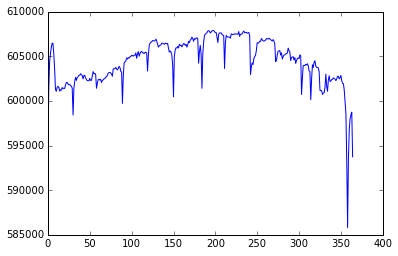

In [6]:
# Combined Plot
lData = []
for i in range(len(Data)):
    lData.append(list(Data[i][1]))
x = np.matrix(lData)
y = x.sum(axis=0)
z = (y.tolist())
plot(z[0])#savgol_filter(z[0], 31, 9))

In [7]:
def col(i,step):
    zz = x[i:i+step]
    y = zz.sum(axis=0)
    z = y.tolist()
    yhat = z[0]#savgol_filter(z[0], 31, 9) # window size 51, polynomial order 3
    YearlyPlots(yhat,ttl=str(1840+i) + '-' + str(1840+i+step) , y=(min(yhat)-30,max(yhat)+30))
    #YearlyPlots(x,y=(min(x)-10,max(x)+10))

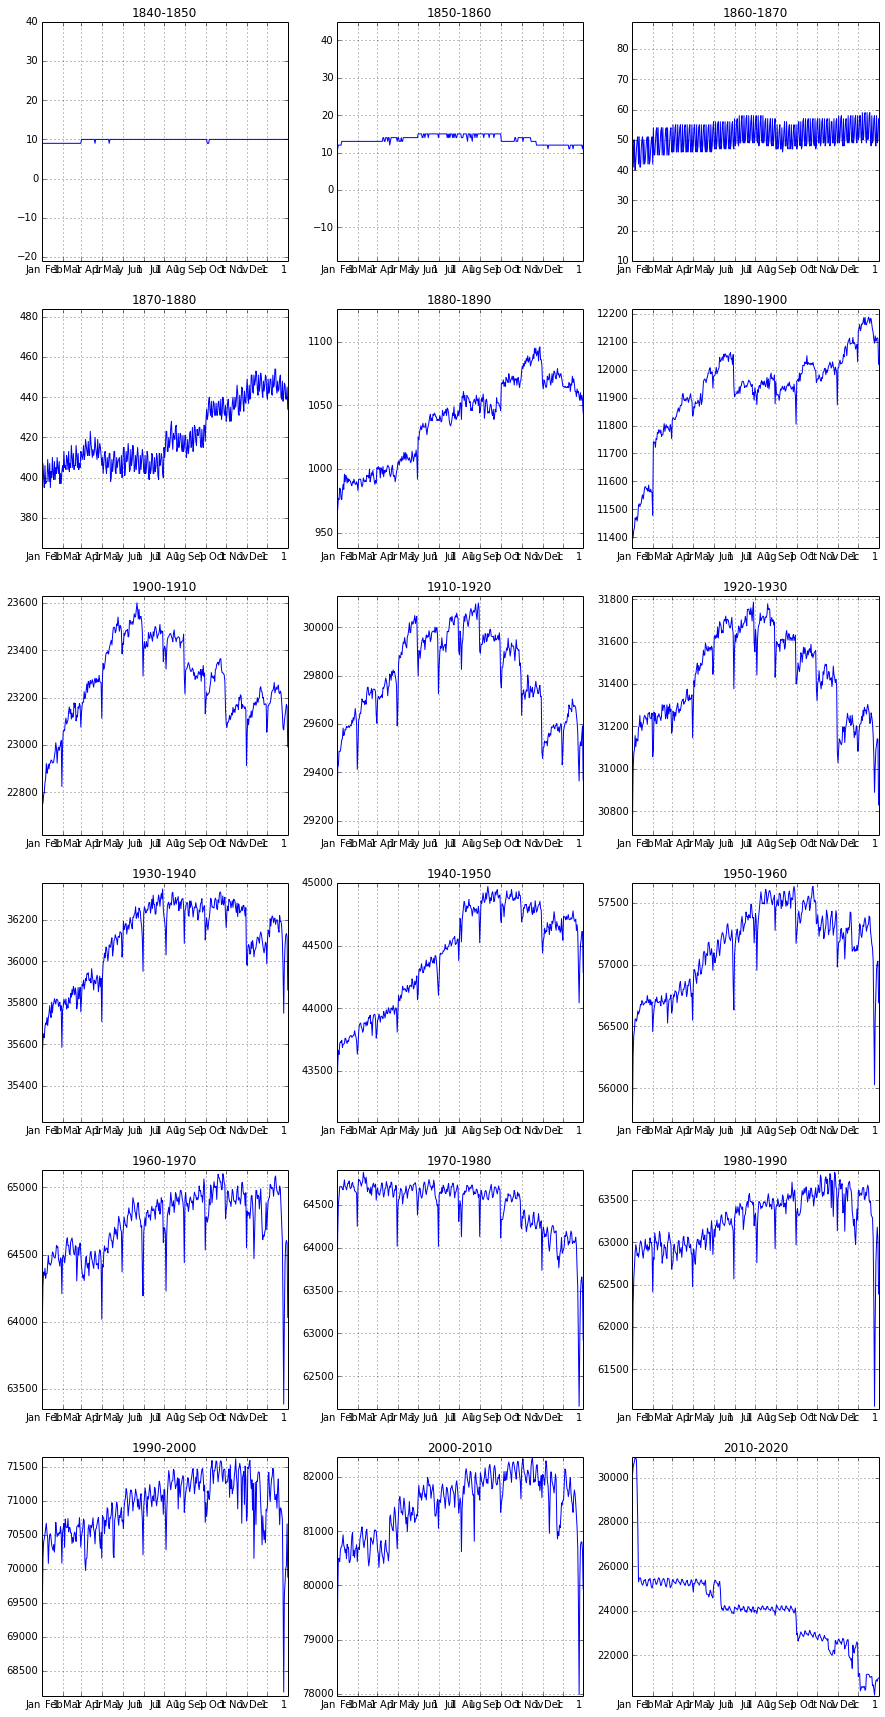

In [17]:
# Plots in size of 10 years giving us representation of plots that are 
figure(figsize=(15,30))
offset=1
step = 10
for i in range(0,174,step):
    subplot(6,3,offset)
    col(i,step)
    offset+=1

## Observation from yearly plots: <br>
1) It can be clearly seen from the 10-yearly plots that the data has prominent monthly dips from 1900 - 1990.<br>
2) These dips gets faded in 1990-2020 readings <br>
3) The value of dips at month end is ~500 readings indicating that a subset of stations are always creating the dips at month end <br>
4) From 1990-2020, it looks that the stations have upgraded their instruments or have been closed.<br>
5) Further these dips can also be observed on Federal Holidays like 4th July, Halloween, ThanksGiving Day, Christmas Day and Christmas Week<br>
6) These dips suggest that those stations are manually operated and doesn't contribute to readings on holidays. Further analysis on sources of NOAA data shows that the data is gathered from Cooperative Network aka COOP. These are volunteer organisation that take daily weather observations at National Parks, seashores, mountaintops, and farms as well as in urban and suburban areas. It can be concluded that there is a small set of volunteer organisation that operates manually & shut its operation on Holidays and may service there machines on month end. These volunteer organisation/people are producing dips in readings 


    

## Station wise plot

In [11]:
DataS=pickle.load(open('../../Data/Weather/apurva_stations.pickle','r'))


In [12]:
DataS = sorted(DataS)
dictData = dict(DataS)
your_keys = dictData.keys()

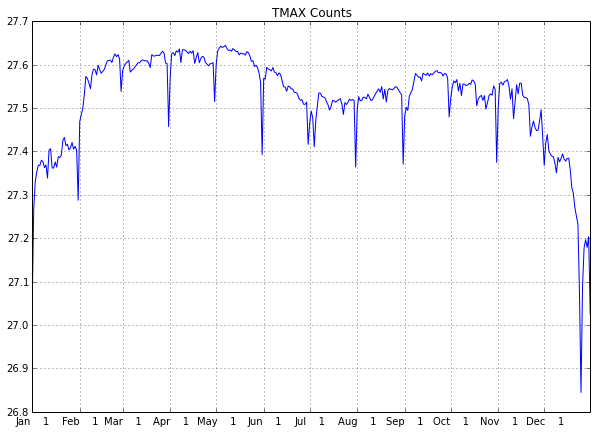

In [13]:
# Plot of average readings a station gives per day in its life time
# It can be seen that ~27 readings per day have been produced by stations .

meanStat = [ zzz/len(your_keys) for zzz in STAT['TMAX']['NE']]
YearlyPlots(meanStat,'TMAX Counts')

The station can be cateogorized into 9 different cateogories according to there network ID which is 3rd digit in Station ID:

'US0','US1','USC','USE','USM','USN','USR','USS','USW'

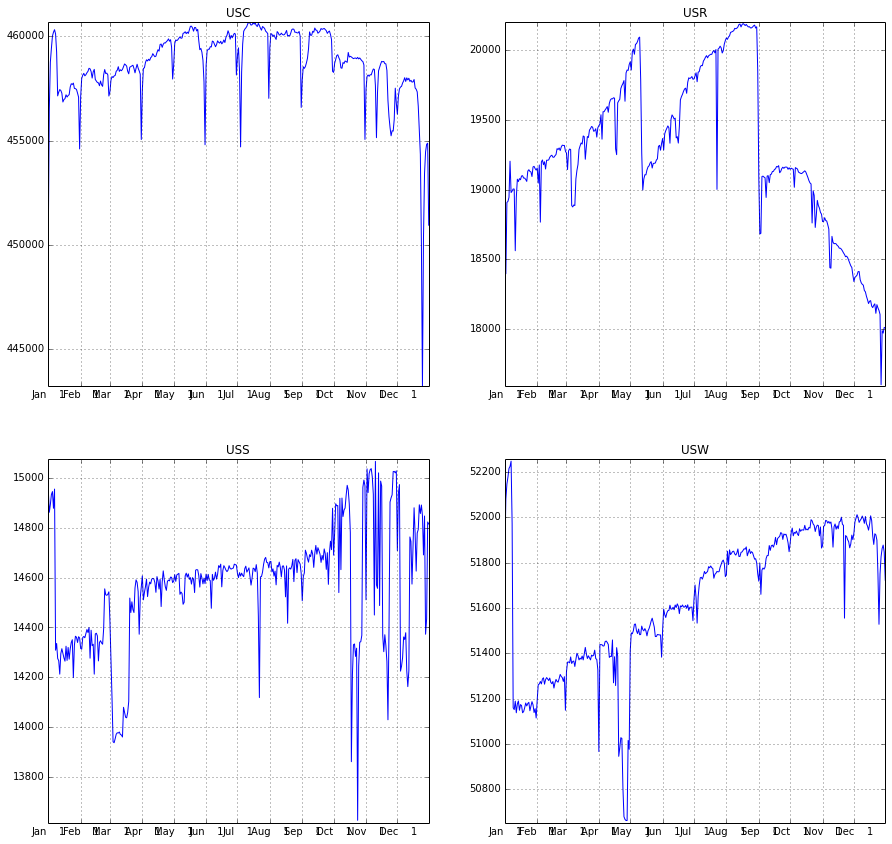

In [16]:
# Plot for readings for different ids of station
idd = ['US0','US1','USC','USE','USM','USN','USR','USS','USW']
offset=1
figure(figsize=(15,30))
your_keys = dictData.keys()
for xxx in idd:
    dict_you_want = { your_key: dictData[your_key] for your_key in your_keys if your_key[0:3] == xxx }
    if (len(dict_you_want.keys()) > 0):
        subplot(4,2,offset)
        offset += 1
        x = np.matrix(dict_you_want.values())
        y = x.sum(axis=0)
        z = (y.tolist())
        YearlyPlots(z[0],ttl=xxx,y=(min(z[0])-10,max(z[0])+10))
        

It can be clearly seen that the major contributor of data the USC is also a major contributor of dips also. These monthly dips are not visible in other datasets.

The USC


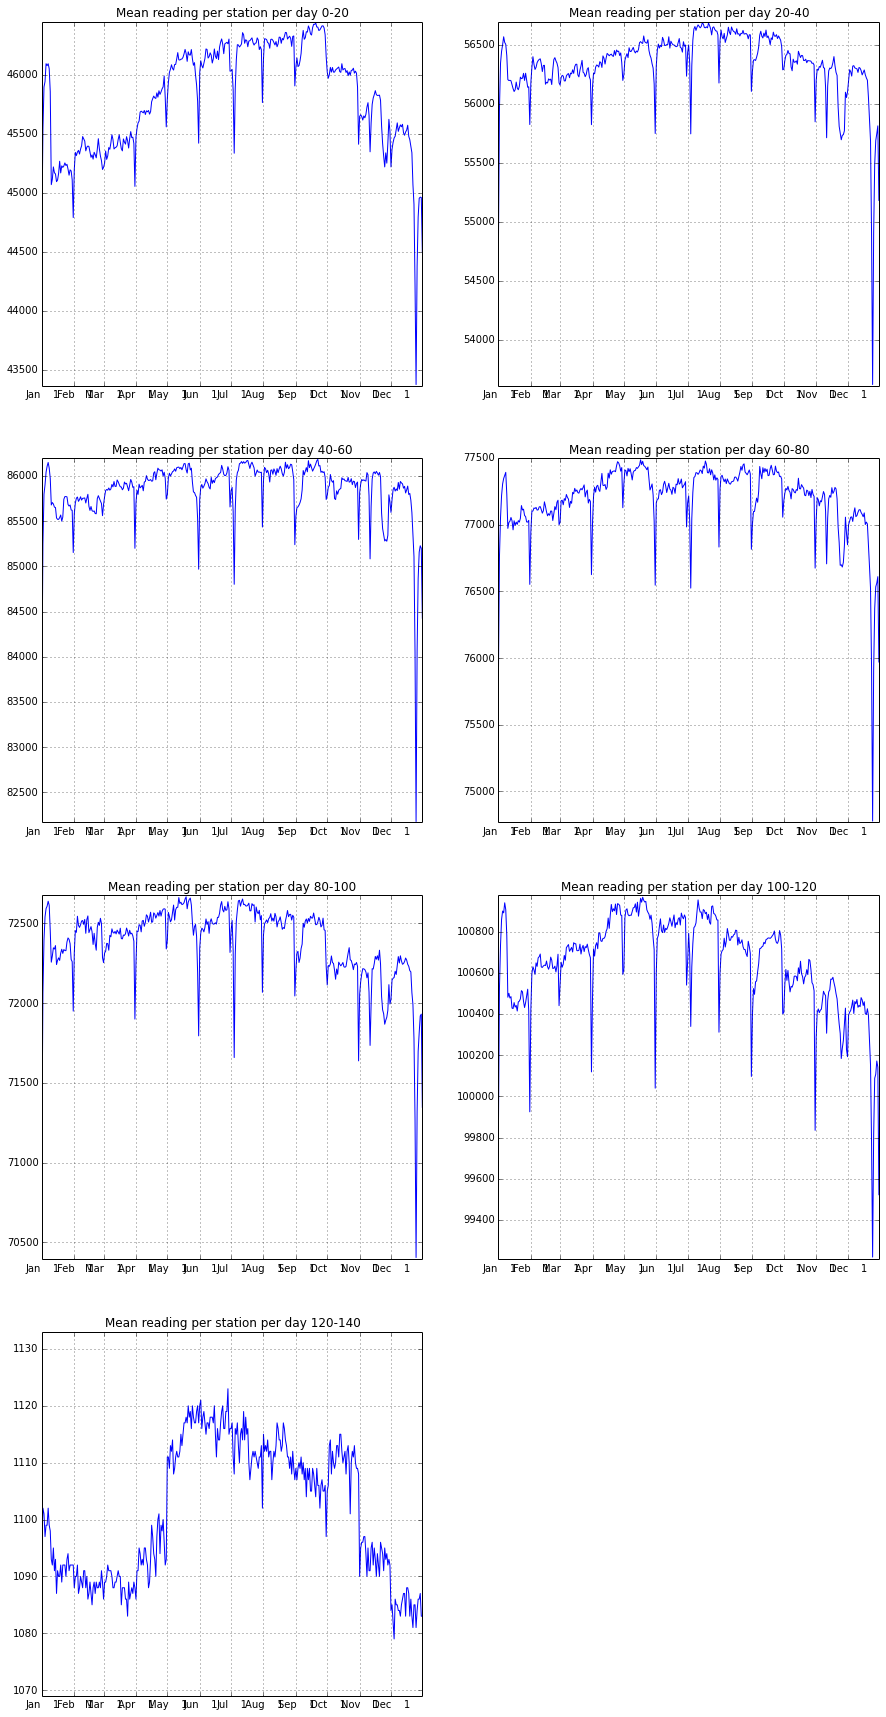

In [17]:
# Plot for mean readings per day between a range (0,140 with step of 20) for USC, 140 is maximum mean reading we have got 
idd = ['USC']
offset=1
figure(figsize=(15,30))
your_keys = dictData.keys()
for j in range(0,140,20):
    dict_you_want = { your_key: dictData[your_key] for your_key in your_keys if your_key[0:3] == 'USC' }
    if (len(dict_you_want.keys()) > 0):
        subplot(4,2,offset)
        offset += 1
        x = np.matrix(dict_you_want.values())
        x = x[np.logical_not([ (int(qqq[0]/365) <= j or int(qqq[0]/365) >= j+20 ) for qqq in x.sum(axis=1).tolist()])]
        y = x.sum(axis=0)
        z = (y.tolist())
        YearlyPlots(z[0],ttl='Mean reading per station per day ' + str(j) + '-' + str(j+20) ,y=(min(z[0])-10,max(z[0])+10))


The monthly dips are still present in the above plot. The plot indicates that the stations that are producing these errors are spread both chronologically and geographically, thus there seperation is difficult.

Seperating the outliers based on mean readings is difficult because they are present in all readings. Further these stations that produces a dip are also distributed geographically and chronologicaly thus seperation of these are dificult. Only possibility is taking readings from 1990 onwards. 

When I checked few data points it can be seen that these data points may have dips at month end but they are not periodical in nature. Some may have dip at month of April and May and Some may have dip in month of month of June, July.

Possible ways to remove the readings that are producing the outliers : 

1. To remove all readings that have Nan at the month end and Nan at 25th December
2. To remove all readings that have value of count of station at month end lesser than 10% of mean value for that station.
2. To extrapolate the readings at month end, if there is only one Nan and adjacent values are all correct.